In [84]:
import statsmodels as sts
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
#Load data
company_sales = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
quebec_sales = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")

company_sales.columns
quebec_sales.columns

Index(['Month', 'Count'], dtype='object')

In [133]:
arr = {
    "Company sales" : company_sales["Count"],
    "Quebec cars sales": quebec_sales["Count"]
}

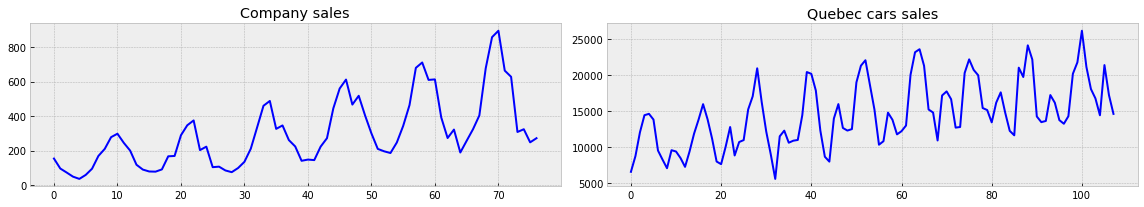

In [134]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(arr.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        arr[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [86]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

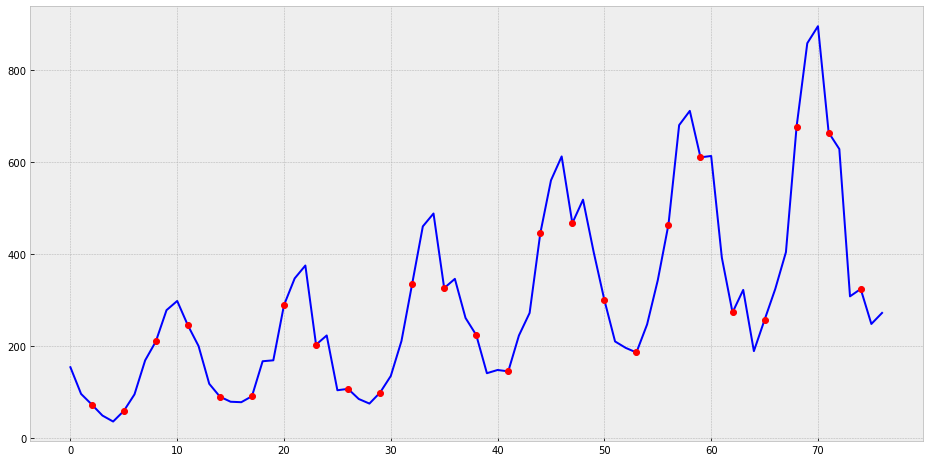

In [135]:
sales_count = company_sales["Count"]
plot_ts_and_points(sales_count, 2, 3)

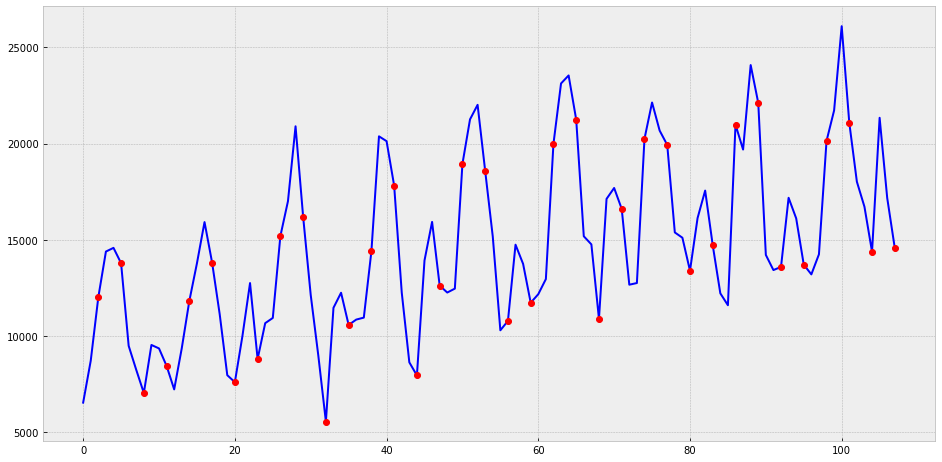

In [116]:
quebec_sales_count = quebec_sales["Count"]
plot_ts_and_points(quebec_sales_count, 2, 3)

In [136]:
from scipy.stats import boxcox

In [137]:
series_sales = boxcox(sales_count, 1)
series_quebec = boxcox(quebec_sales_count, 1)

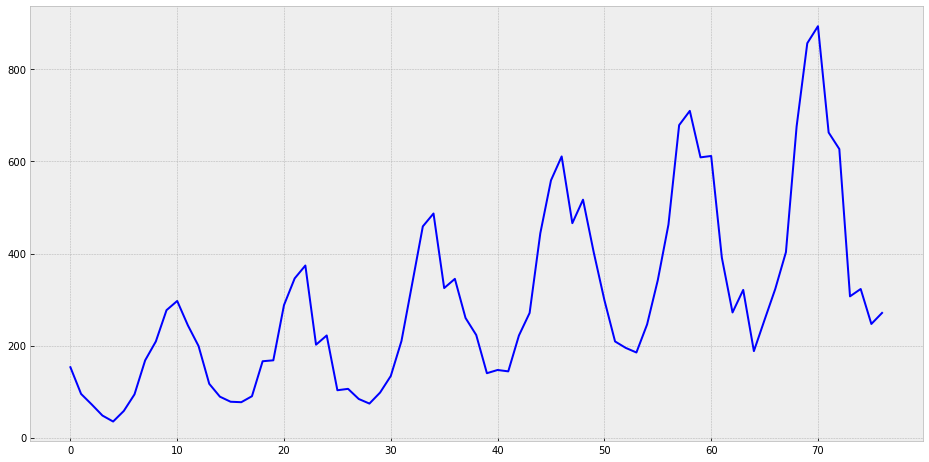

In [138]:
#Company sales
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_sales, color='blue')

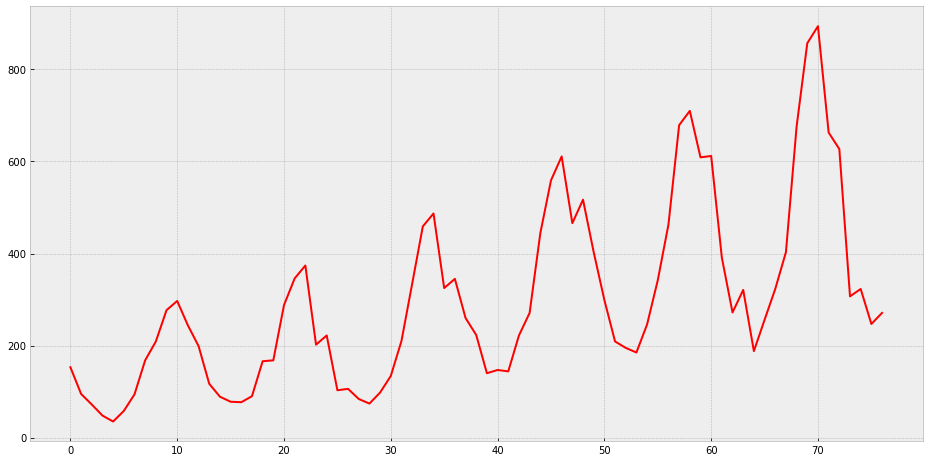

In [139]:
#Quebec car sales
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_sales, color='red')

In [140]:
import numpy as np

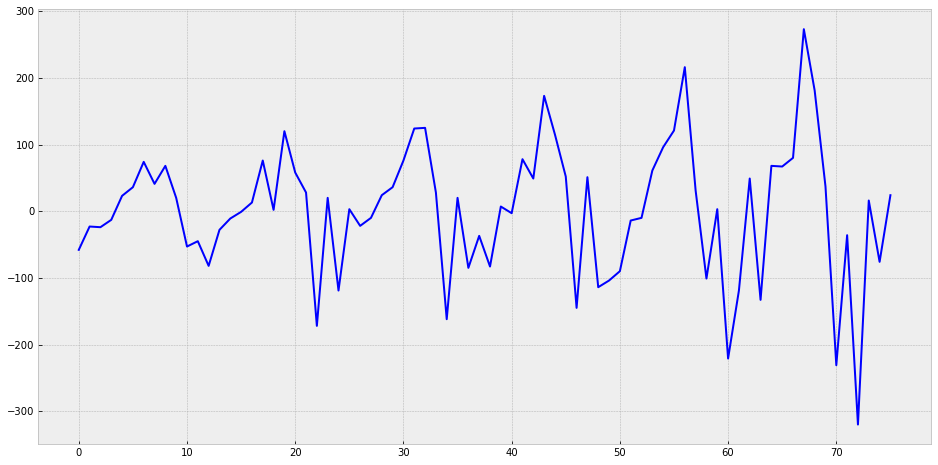

In [141]:
#Company sales
series_sales = np.diff(series_sales, 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_sales, color='blue')

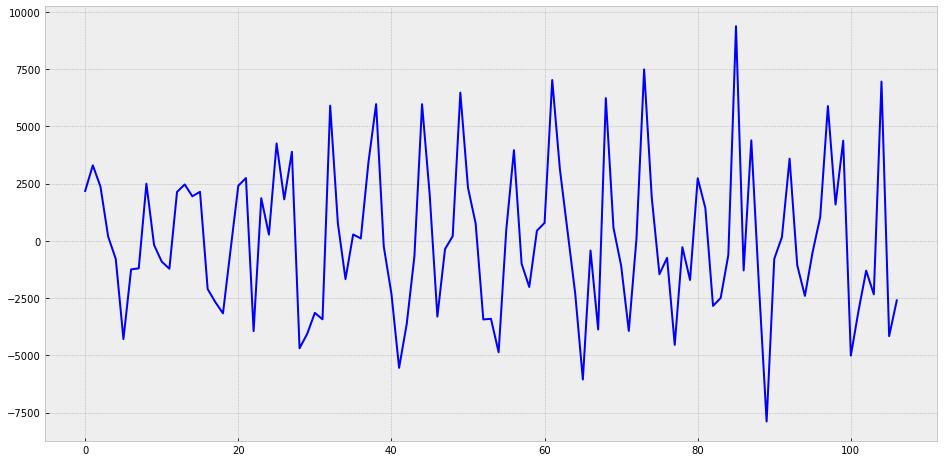

In [142]:
#Queber sales
series_quebec = np.diff(series_quebec, 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_quebec, color='blue')

In [143]:
from statsmodels.tsa.stattools import adfuller

In [144]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [145]:
#Company Sales
test_stationarity(series_sales)

Results of Dickey-Fuller Test:
Test Statistic                 -2.587970
p-value                         0.095509
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [149]:
test_stationarity(company_sales["Count"])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


In [151]:
#Quebec Sales
test_stationarity(series_quebec)

Results of Dickey-Fuller Test:
Test Statistic                -6.199799e+00
p-value                        5.844753e-08
#Lags Used                     1.100000e+01
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64


In [152]:
test_stationarity(quebec_sales["Count"])

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [153]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [154]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

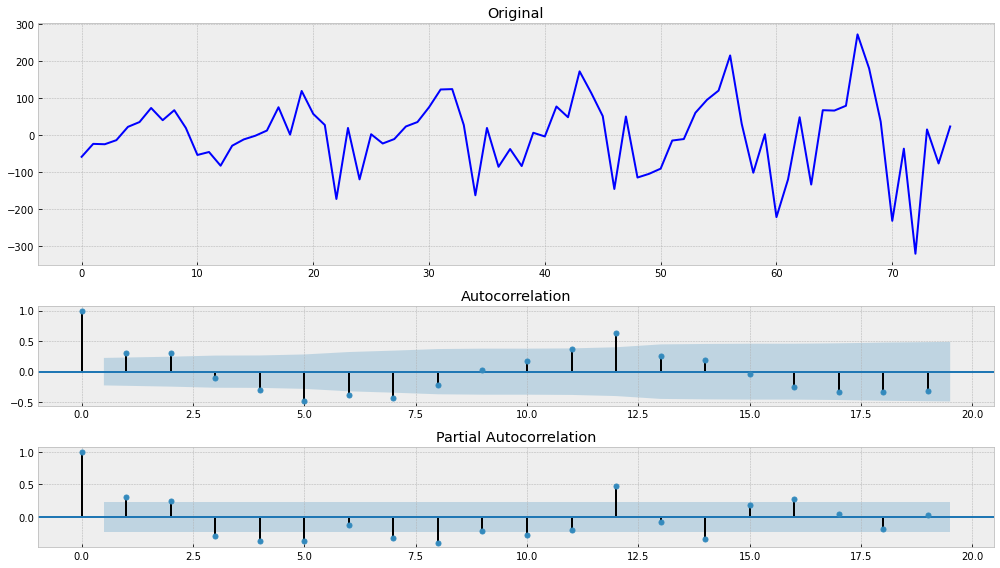

In [158]:
#Company sales
tsplot(series_sales)

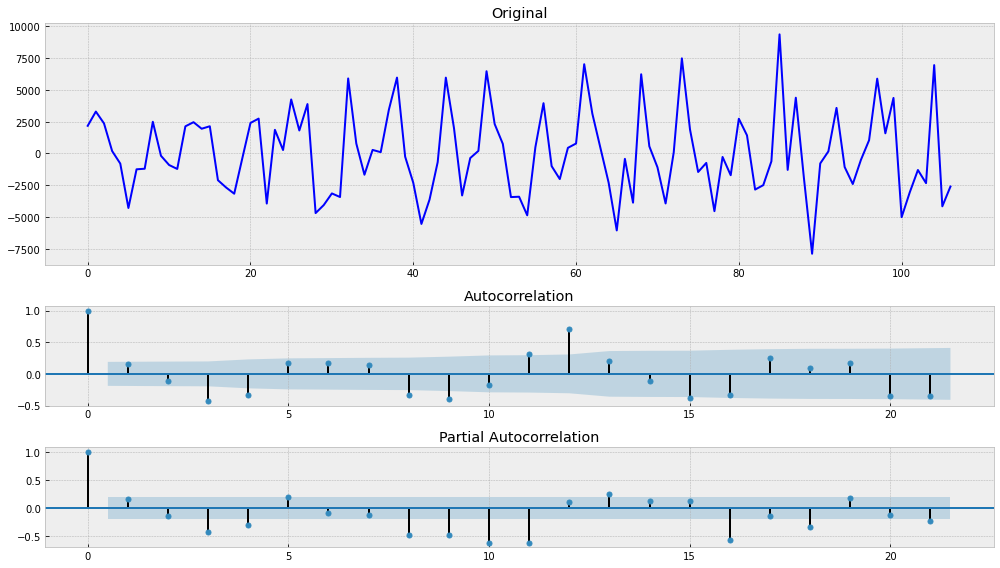

In [159]:
#Company sales
tsplot(series_quebec)